### trend visualization

In [85]:
# load data
library(ncdf4)
library(ggplot2)
library(lubridate)
library(gamm4)
library(mgcv)
library(rjson)
source("helper.R")
database <- '/home/jianj0c/dataset/redsea/'
data_folder  <- 'Chlorophyll/8-Days_composite/'
dir_path <- paste(database,data_folder,"Aqua_MODIS_chloA_8_Days_Composite.2003_2022.nc",sep="")
nc_obj <- nc_open(dir_path)
config<-fromJSON(file="config.json")
T_array <- ncvar_get(nc_obj,"chlorophyllA")
dim(T_array)

[1] 268 423 890

### configuration

In [138]:
task_paral_maximum<-parallel::detectCores()//2

ERROR: Error in parse(text = x, srcfile = src): <text>:1:45: unexpected '/'
1: task_paral_maximum<-parallel::detectCores()//
                                                ^


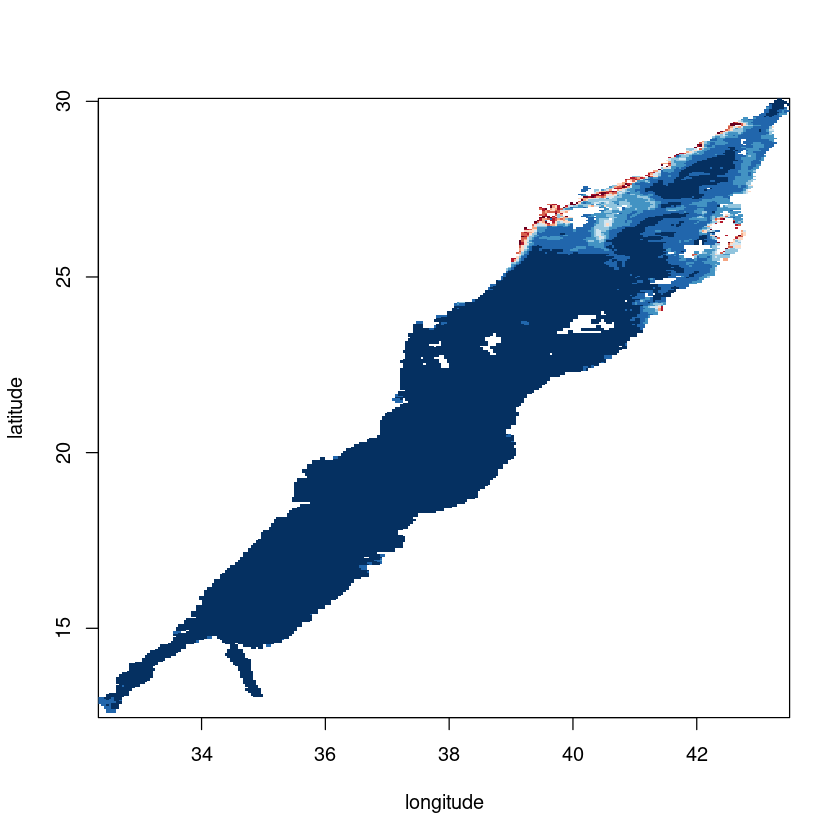

In [58]:
longitude<-nc_obj$dim[[1]]$vals
latitude <- nc_obj$dim[[2]]$vals
timestamp <- nc_obj$dim[[3]]$vals
visualize_frame_raw(T_array[,,819],latitude,longitude)


In [134]:
results<-list()
for (latitude_i in 1:length(latitude)) {

  for (longitude_i in 1:length(longitude)){
    raw_t=seq(1,length(timestamp))
    raw_y=T_array[longitude_i,latitude_i,1:length(timestamp)]

    t<-raw_t[!is.na(raw_y)]
    y<-raw_y[!is.na(raw_y)]
    if (length(t)>config$thres_min_data_point){
      data=data.frame(t,y)
      model<-gam(y~t,family=Gamma(link = "log"),data=data) 
      results<-append(results,model$coefficients["t"])
    }
    else{
      results<-append(results,NA)
    }
  }

}

visualize_frame_raw(matrix,lantitude,latidude)

In [143]:
class(results)

[1] "list"

In [145]:
matrix<-unlist(results)
dim(matrix) <- c(length(longitude), length(latitude))

In [153]:
matrix <- t(matrix)

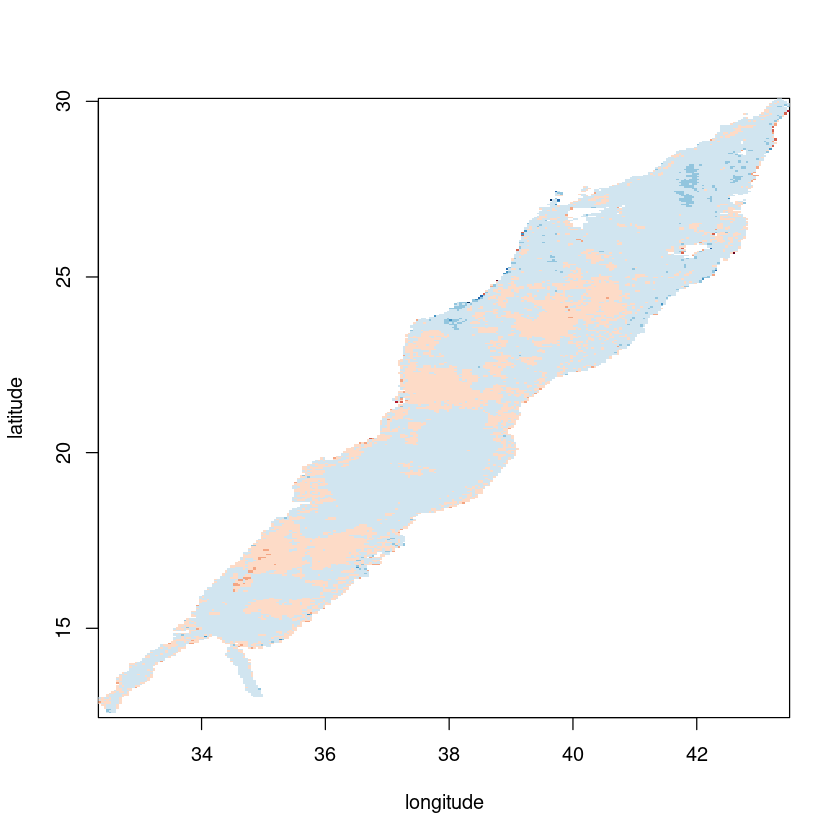

In [135]:
length(results)

[1] 113364

In [117]:
df = data.frame(t,y)
model<-gam(y~t,family=Gamma(link = "log"),data=df)

t 
-0.0002524464

In [116]:
summary(model)


Family: gaussian 
Link function: identity 

Formula:
y ~ t

Parametric coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  4.5061232  0.3052821  14.761   <2e-16 ***
t           -0.0009011  0.0005947  -1.515     0.13    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


R-sq.(adj) =  0.00308   Deviance explained = 0.546%
GCV =  10.07  Scale est. = 10.022    n = 420

In [113]:
names(model)

[1] "coefficients"      "residuals"         "fitted.values"    
 [4] "family"            "linear.predictors" "deviance"         
 [7] "null.deviance"     "iter"              "weights"          
[10] "prior.weights"     "df.null"           "y"                
[13] "converged"         "sig2"              "edf"              
[16] "edf1"              "hat"               "R"                
[19] "boundary"          "sp"                "nsdf"             
[22] "Ve"                "Vp"                "rV"               
[25] "mgcv.conv"         "gcv.ubre"          "aic"              
[28] "rank"              "gcv.ubre.dev"      "scale.estimated"  
[31] "method"            "smooth"            "formula"          
[34] "var.summary"       "cmX"               "model"            
[37] "control"           "terms"             "pred.formula"     
[40] "pterms"            "assign"            "xlevels"          
[43] "offset"            "df.residual"       "min.edf"          
[46] "optimizer"         "call"

In [111]:
coefficients$coefficients

(Intercept)             t 
 4.5061232414 -0.0009011087

In [70]:
y=T_array[longitude_i,latitude_i,1:length(timestamp)]
data=data.frame(x,y)

In [72]:
x[!is.na(y)]

integer(0)

In [83]:
model$coefficients

(Intercept)           t 
          1           1

### GAM quick tutorial

In [76]:
names(model)

[1] "coefficients"      "residuals"         "fitted.values"    
 [4] "family"            "linear.predictors" "deviance"         
 [7] "null.deviance"     "iter"              "weights"          
[10] "working.weights"   "prior.weights"     "z"                
[13] "df.null"           "y"                 "converged"        
[16] "boundary"          "rV"                "db.drho"          
[19] "dw.drho"           "dVkk"              "ldetS1"           
[22] "reml.scale"        "aic"               "rank"             
[25] "warn"              "gcv.ubre"          "sp"               
[28] "scale"             "scale.estimated"   "control"          
[31] "method"            "Vc"                "Vp"               
[34] "Ve"                "V.sp"              "edf"              
[37] "edf1"              "edf2"              "hat"              
[40] "F"                 "R"                 "nsdf"             
[43] "sig2"              "smooth"            "formula"          
[46] "var.summary"       "cmX"               "model"            
[49] "terms"             "pred.formula"      "pterms"           
[52] "assign"            "xlevels"           "offset"           
[55] "df.residual"       "min.edf"           "optimizer"        
[58] "call"

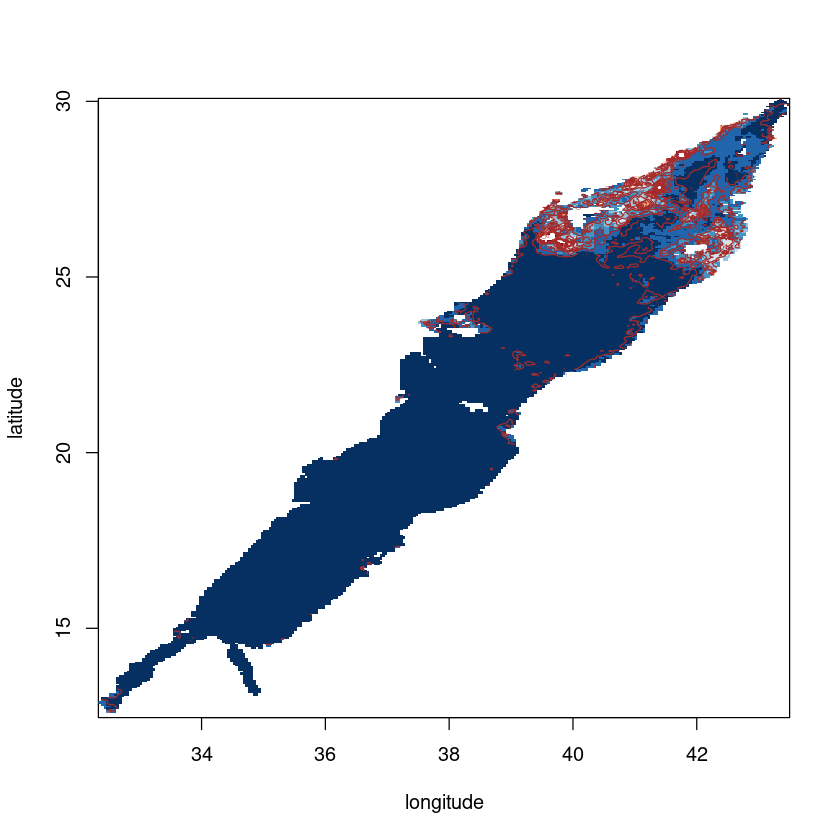

In [40]:
longitude<-nc_obj$dim[[1]]$vals
latitude <- nc_obj$dim[[2]]$vals
visualize_frame_level(T_array[,,821],latitude,longitude,nlevel=10)


         Min.       1st Qu.        Median          Mean       3rd Qu. 
            0             0             0             1             0 
         Max.     Valid.Ent Valid.percent 
          100      11315119            11 


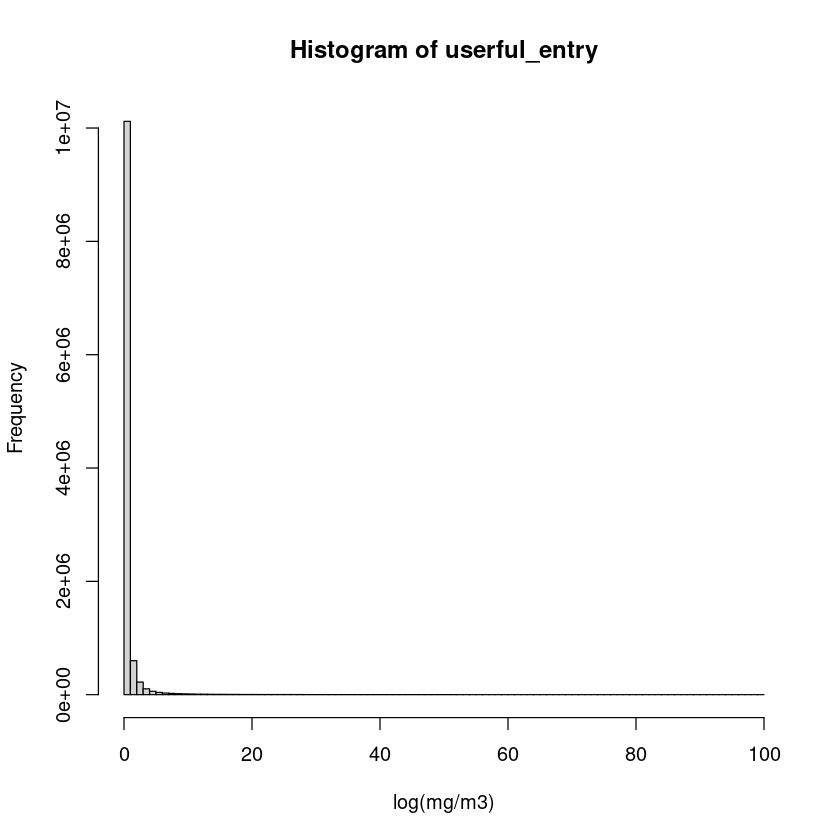

In [12]:
helper_describe(T_array)

         Min.       1st Qu.        Median          Mean       3rd Qu. 
           -3            -2            -2            -1            -1 
         Max.     Valid.Ent Valid.percent           Std 
            2      11242030            11             1 


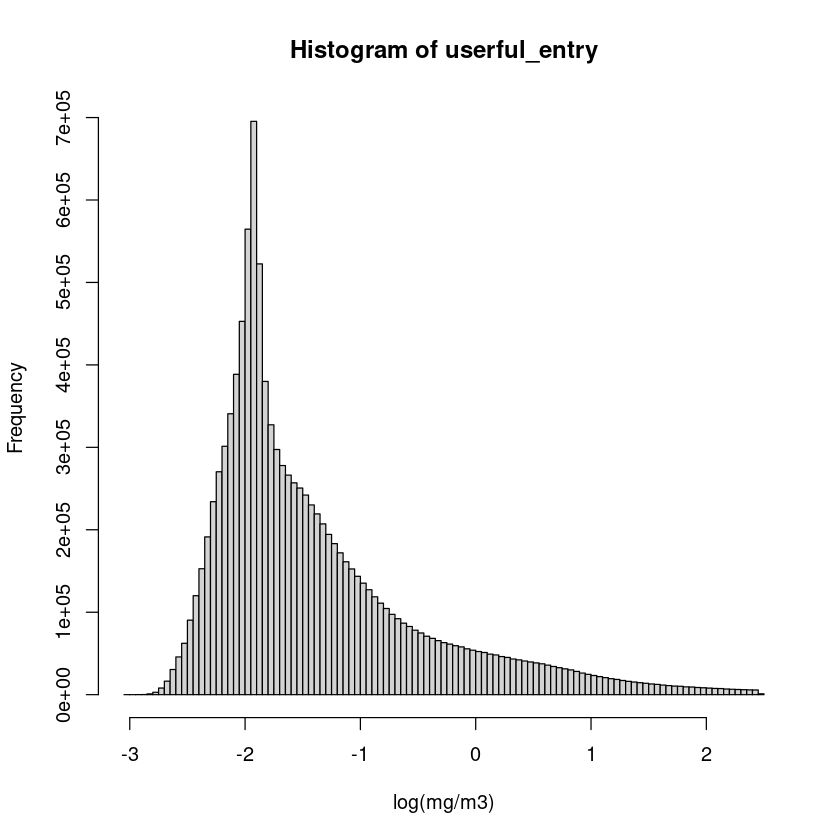

In [3]:
T_array[pipeline_filter_for_outlier(T_array,5)]=NA

helper_describe(T_array)

In [ ]:
visualize_frame_level

In [38]:
dim(pipeline_filter_for_outlier(T_array,5))

[1] 268 423 890

In [62]:
xxx

    Min.  1st Qu.   Median     Mean  3rd Qu.     Max.       cd 
 0.04961  0.13693  0.18800  0.62714  0.37223 99.90134  3.00000 

In [47]:
length(T_array[!is.na(T_array)&T_array>30])

[1] 11728

In [25]:
dim(T_array)

[1] 268 423 890

In [33]:
mean(T_array,na.rm=TRUE)

var(T_array,na.rm=TRUE)

[1] 0.6271374

[1] 4.898936

In [35]:
min(T_array,na.rm=TRUE)

[1] 0.049608

In [34]:
max(T_array,na.rm=TRUE)

[1] 99.90134

In [128]:



# filter the outlier value based on xx method
pipeline_filter_for_outlier <- function(array) { # create a function with the name my_function
  print("Hello World!")
  return (array)
}


# take one 3d arrayday reduce the 3d data to 2d
reducer_trend<- function(array) { 
  print("Hello World!")
  return (array)
}


#
reduce_seasonal<- function(array) { 
  print("Hello World!")
  return (array)
}


# take one 3d arrayday reduce the 3d data to 2d
reducer2_correlation<-function(array1, array2){

  return (array1+array2)
}




